In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = ('/content/drive/MyDrive/BDM_Proj/WaveData.xlsx')


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path4 = ('/content/drive/MyDrive/BDM_Proj/likesperpost.xlsx')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import math
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats
import gspread as gs
import plotly.graph_objects as go
import requests
from io import BytesIO
import datetime

In [ ]:
df = pd.read_excel(path)

In [ ]:
df

,Date,Estimate Number,Customer,Amount in RS
0,2019-03-26,2019-002,Amruta Aundhekar,74500
1,2019-04-14,2019-003,Shantanu Kulkarni,77000
2,2019-04-16,2019-004,Shruti Dasgopal,82000
3,2019-05-04,2019-005,Koustubh Mokashi,12500
4,2019-05-08,2019-006,Gaurav Wani,23000
...,...,...,...,...
263,2023-04-07,2020-00261,Anuroop Wiwaha Pvt Ltd GST no. : 27AAVCA3440L1Z8,22000
264,2023-04-10,2020-00263,Sayalee Joshi-Marathe,82000
265,2023-04-10,2020-00262,Mrunal Kulkarni,115000
266,2023-04-25,2020-00264,Aishwarya Dange,38000


In [ ]:
df.describe()

,Amount in RS
count,268.000000
mean,65985.541045
std,55021.196957
min,4000.000000
25%,24000.000000
50%,48750.000000
75%,95000.000000
max,301000.000000


In [ ]:
data_2019 = df.loc[df['Date'] < '2020-01-01']
data_2019

,Date,Estimate Number,Customer,Amount in RS
0,2019-03-26,2019-002,Amruta Aundhekar,74500
1,2019-04-14,2019-003,Shantanu Kulkarni,77000
2,2019-04-16,2019-004,Shruti Dasgopal,82000
3,2019-05-04,2019-005,Koustubh Mokashi,12500
4,2019-05-08,2019-006,Gaurav Wani,23000
5,2019-05-17,2019-007,Gaurav Wani,92000
6,2019-05-24,2019-008,Ruchi Gupta,10000
7,2019-05-29,2019-009,Amey Parvate,57000
8,2019-06-19,2019-0011,Mrunmayee Datar,77000
9,2019-06-19,2019-0010,Aabha Deshpande,77000


2019 Data

Estimates per month

col_0  count
Date        
3          1
4          2
5          5
6          5
7          1
8          3
10         3
11         3
12         6


Text(0.5, 1.0, '2019')

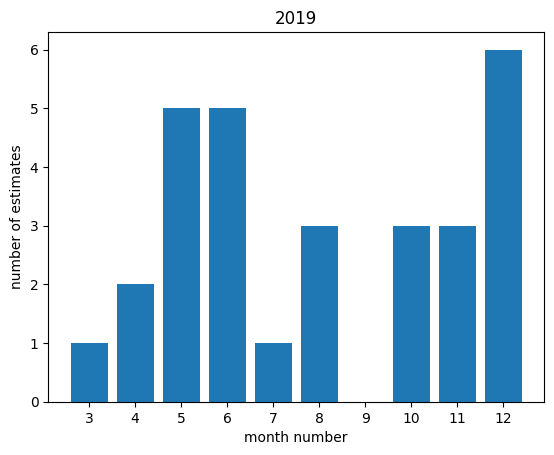

In [ ]:
x = data_2019['Date'].dt.month
x1 = list(x)
x1 = set(x1)
#print(x1)
x1 = list(x1)
y = pd.crosstab(index=x, columns='count')
print(y)
months = ['jan', 'feb', 'march', 'april', 'may', 'june', 'july', 'august', 'sept', 'oct', 'nov', 'dec']
plt.xticks(np.arange(0,13))
#plt.xticks(months)
plt.bar(x1, y['count'])
plt.xlabel('month number')
plt.ylabel('number of estimates')
plt.title('2019')

Average sales

In [ ]:
s = data_2019['Amount in RS']
#print(s)
s = list(s)
print('total sales estimated: ', sum(s))
sum_2019_est = sum(s)
a = sum(s)/len(s)
print('average sales estimated: ', a)

total sales estimated:  1564625
average sales estimated:  53952.58620689655


In [ ]:
path1 = ('/content/drive/MyDrive/BDM_Proj/invoices.xlsx')
df1 = pd.read_excel(path1)
df1

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Estimate Number,Date,Number,Customer,Total
0,NaN,2023-04-10,93,Anuroop Wiwaha Pvt Ltd GST no. : 27AAVCA3440L1Z8,22000
1,NaN,2023-04-07,92,Anuroop Wiwaha Pvt Ltd GST no. : 27AAVCA3440L1Z8,12200
2,NaN,2023-04-03,91,Shruti Kulkarni,198000
3,NaN,2023-03-04,90,FullHouse Entertainment & Media Solutions,33000
4,NaN,2023-02-23,89,Emerson Climate Technologies India Private Lim...,8000
...,...,...,...,...,...
82,NaN,2020-01-15,5,Purva gore,11500
83,NaN,2020-01-10,4,Chrysalis,6500
84,NaN,2019-08-02,3,Aadi Culturetainment,5900
85,NaN,2019-07-26,2,Amruta Devale,32000


In [ ]:
data_2019_inv = df1.loc[df1['Date'] < '2020-01-01']
data_2019_inv

,Estimate Number,Date,Number,Customer,Total
84,NaN,2019-08-02,3,Aadi Culturetainment,5900
85,NaN,2019-07-26,2,Amruta Devale,32000
86,2019-004,2019-04-16,1,Shruti Dasgopal,93000


In [ ]:
sale = data_2019_inv['Total']
sale = list(sale)
sum_2019_inv = sum(sale)
print('total sales: ',sum_2019_inv)

total sales:  130900


percentage of sales (expected vs real)

In [ ]:
perc_2019 = sum_2019_inv / sum(s) *100
print(perc_2019)

8.366221938164097


In [ ]:

mask = (df['Date'] > '2020-01-01') & (df['Date'] < '2021-01-01')
data_2020 = df.loc[mask]
data_2020

,Date,Estimate Number,Customer,Amount in RS
29,2020-01-02,2019-0030,Nupur Pable,13000
30,2020-01-09,2019-0033,Krupa Ajansondkar,28500
31,2020-01-09,2019-0032,Piyush Shedage,65000
32,2020-01-09,2019-0031,Digvita Shah,55000
33,2020-01-10,2019-0034,Chrysalis,6500
...,...,...,...,...
92,2020-12-16,2020-0049,Prathamesh Pawar,80000
93,2020-12-17,2020-0089,Satish Kadu,39500
94,2020-12-20,2020-0090,Manasi Vaidya,103000
95,2020-12-21,2020-0091,Aniket Karhadkar,5000


In [ ]:
mask1 = (df1['Date'] > '2020-01-01') & (df1['Date'] < '2021-01-01')
data_2020_inv = df1.loc[mask1]
data_2020_inv

,Estimate Number,Date,Number,Customer,Total
58,NaN,2020-12-21,35,Ketaki Dalvi,28000
59,NaN,2020-12-21,34,Aniket Karhadkar,5000
60,NaN,2020-12-17,33,Satish Kadu,39500
61,NaN,2020-12-16,32,Sushma Chavan,5500
62,NaN,2020-12-16,31,Prathamesh Pawar,80000
63,NaN,2020-12-04,30,Harshad Yadav,4000
64,NaN,2020-12-04,29,Ketan Kulkarni,26000
65,NaN,2020-12-01,27,Devendra Bhome,65000
66,NaN,2020-11-18,26,Jaydeep Vaidya,12000
67,NaN,2020-11-11,24,Deepak Savant,72000


In [ ]:
sum_2020_inv = df1['Total']
sum_2020_inv = sum(sum_2020_inv)

In [ ]:
sum_2020_est = df['Amount in RS']
sum_2020_est = sum(sum_2020_est)

In [ ]:
perc_2020 = sum_2020_inv / sum_2020_est *100
print(perc_2020)

23.750114862906706


col_0  count
Date        
1          6
2          2
3          1
6          6
7          3
8          2
9          4
10        20
11        13
12        11


Text(0.5, 1.0, '2020 estimates')

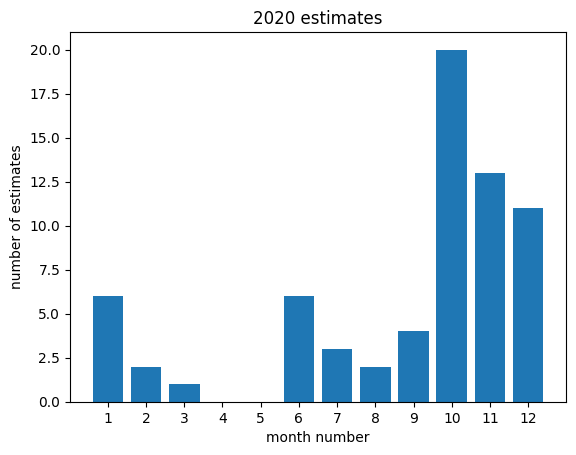

In [ ]:
x = data_2020['Date'].dt.month
x11 = list(x)
x1 = set(x11)
#print(x1)
x1 = list(x1)
y2 = pd.crosstab(index=x, columns='count')
print(y2)
months = ['jan', 'feb', 'march', 'april', 'may', 'june', 'july', 'august', 'sept', 'oct', 'nov', 'dec']
plt.xticks(np.arange(0,13))
#plt.xticks(months)
plt.bar(x1, y2['count'])
plt.xlabel('month number')
plt.ylabel('number of estimates')
plt.title('2020 estimates')

col_0  count
Date        
1          2
6          3
7          4
8          1
9          1
10         2
11         5
12         8


Text(0.5, 1.0, '2020 invoices')

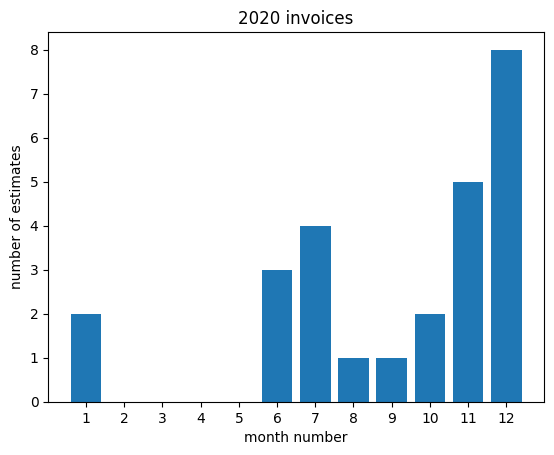

In [ ]:
x = data_2020_inv['Date'].dt.month
x12 = list(x)
x1 = set(x12)
#print(x1)
x2 = list(x1)
y3 = pd.crosstab(index=x, columns='count')
print(y3)
months = ['jan', 'feb', 'march', 'april', 'may', 'june', 'july', 'august', 'sept', 'oct', 'nov', 'dec']
plt.xticks(np.arange(0,13))
#plt.xticks(months)
plt.bar(x2, y3['count'])
plt.xlabel('month number')
plt.ylabel('number of estimates')
plt.title('2020 invoices')

In [ ]:
mask2 = (df['Date'] > '2021-01-01') & (df['Date'] < '2022-01-01')
data_2021_est = df.loc[mask2]
data_2021_est

,Date,Estimate Number,Customer,Amount in RS
97,2021-01-13,2020-0094,Manali Pendse,57000
98,2021-01-15,2020-0095,Sonali Mitra,5500
99,2021-01-18,2020-0096,Atul(Tanushree's Reference),13500
100,2021-01-29,2020-0098,Nikhil Mangire,15000
101,2021-01-29,2020-0097,Venkatesh Deshmukh,18500
...,...,...,...,...
174,2021-12-11,2020-00173,Malathi Mohan,35000
175,2021-12-23,2020-00175,Mugdha Todkar,110000
176,2021-12-23,2020-00174,Parth Pithadiya,10000
177,2021-12-24,2020-00176,Sayali Mone,115000


In [ ]:
mask3 = (df1['Date'] > '2021-01-01') & (df1['Date'] < '2022-01-01')
data_2021_inv = df1.loc[mask3]
data_2021_inv

,Estimate Number,Date,Number,Customer,Total
28,NaN,2021-12-22,65,Parth Pithadiya,10000
29,NaN,2021-12-16,64,Devendra Bhome,35000
30,NaN,2021-12-16,63,Anuroop Wiwaha Pvt Ltd GST no. : 27AAVCA3440L1Z8,3000
31,NaN,2021-12-12,62,Blue Ramp management,16000
32,NaN,2021-11-23,61,Shruti Jategaonkar,95000
33,NaN,2021-11-23,60,Hrishiraj,275000
34,NaN,2021-11-09,59,Madhura Ankli,65000
35,NaN,2021-10-21,58,Prachee Ranade,37000
36,NaN,2021-10-10,57,Yash Gokhale,53000
37,NaN,2021-10-10,56,Dipti Shendge,43500


In [ ]:
sum_2021_inv = data_2021_inv['Total']
sum_2021_inv = sum(sum_2021_inv)

In [ ]:
sum_2021_est = data_2021_est['Amount in RS']
sum_2021_est = sum(sum_2021_est)

In [ ]:
perc_2021 = sum_2021_inv / sum_2021_est *100
print(perc_2021)

24.504223586088564


In [ ]:
mask4 = (df['Date'] > '2022-01-01') & (df['Date'] < '2023-01-01')
data_2022_est = df.loc[mask4]
data_2022_est

,Date,Estimate Number,Customer,Amount in RS
179,2022-01-04,2020-00179,Shalaka Gosavi,115000
180,2022-01-04,2020-00178,Neeraj Kulkani,144000
181,2022-01-10,2020-00180,Pratik Walgude,221000
182,2022-01-19,2020-00181,Prathamesh Hambir,121000
183,2022-01-25,2020-00182,Snehal Khot,53000
...,...,...,...,...
243,2022-11-10,2020-00241,Pranav Gore,110000
244,2022-11-22,2020-00242,Shruti Kulkarni,198000
245,2022-11-28,2020-00243,Smita Bapat,28000
246,2022-12-23,2020-00244,Madhurima Sawale,34000


In [ ]:
mask5 = (df1['Date'] > '2022-01-01') & (df1['Date'] < '2023-01-01')
data_2022_inv = df1.loc[mask5]
data_2022_inv

,Estimate Number,Date,Number,Customer,Total
12,NaN,2022-12-26,81,Anuroop Wiwaha Pvt Ltd GST no. : 27AAVCA3440L1Z8,3500
13,NaN,2022-12-03,80,Shantanu Kulkarni,105000
14,NaN,2022-12-03,79,Karuna Haladkeri,90000
15,NaN,2022-12-03,78,Sampda Telang,110000
16,NaN,2022-12-03,77,Pranav Gore,110000
17,NaN,2022-11-15,76,Anuroop Wiwaha Pvt Ltd GST no. : 27AAVCA3440L1Z8,2500
18,NaN,2022-08-22,75,Anuroop Wiwaha Pvt Ltd GST no. : 27AAVCA3440L1Z8,10000
19,NaN,2022-06-16,74,Anuroop Wiwaha Pvt Ltd GST no. : 27AAVCA3440L1Z8,20000
20,NaN,2022-05-29,73,Coditation Systems,26000
21,NaN,2022-04-12,72,Anand Dandale,19000


In [ ]:
sum_2022_inv = data_2022_inv['Total']
sum_2022_inv = sum(sum_2022_inv)

In [ ]:
sum_2022_est = data_2022_est['Amount in RS']
sum_2022_est = sum(sum_2022_est)

In [ ]:
perc_2022 = sum_2022_inv / sum_2022_est *100
print(perc_2022)

20.687675793582457


In [ ]:
mask6 = (df['Date'] > '2023-01-01') & (df['Date'] < '2024-01-01')
data_2023_est = df.loc[mask6]
data_2023_est

,Date,Estimate Number,Customer,Amount in RS
248,2023-01-02,2020-00246,Anuroop Wiwaha Pvt Ltd GST no. : 27AAVCA3440L1Z8,25200
249,2023-01-10,2020-00247,Pooja Navalli,32000
250,2023-01-14,2020-00248,Suyash Kulkarni,137000
251,2023-02-24,2020-00249,Digvijay Chavan,120000
252,2023-03-05,2020-00250,Rutuja Pathak,15000
253,2023-03-14,2020-00251,Niralee Aphale,102500
254,2023-03-18,2020-00252,Ajinkya Shinde,44000
255,2023-03-26,2020-00253,Mayuri Khare,180000
256,2023-04-02,2020-00259,Sumit Tambe,120000
257,2023-04-02,2020-00258,Shreyas Vaidya,123000


In [ ]:
mask7 = (df1['Date'] > '2023-01-01') & (df1['Date'] < '2024-01-01')
data_2023_inv = df1.loc[mask7]
data_2023_inv

,Estimate Number,Date,Number,Customer,Total
0,NaN,2023-04-10,93,Anuroop Wiwaha Pvt Ltd GST no. : 27AAVCA3440L1Z8,22000
1,NaN,2023-04-07,92,Anuroop Wiwaha Pvt Ltd GST no. : 27AAVCA3440L1Z8,12200
2,NaN,2023-04-03,91,Shruti Kulkarni,198000
3,NaN,2023-03-04,90,FullHouse Entertainment & Media Solutions,33000
4,NaN,2023-02-23,89,Emerson Climate Technologies India Private Lim...,8000
5,NaN,2023-01-30,88,Anuroop Wiwaha Pvt Ltd GST no. : 27AAVCA3440L1Z8,4500
6,NaN,2023-01-30,87,Anuroop Wiwaha Pvt Ltd GST no. : 27AAVCA3440L1Z8,3000
7,NaN,2023-01-28,86,Shreya Patwardhan,113000
8,NaN,2023-01-28,85,Madhurima Sawale,34000
9,NaN,2023-01-28,84,Abhishek Deshpande,128000


In [ ]:
sum_2023_inv = data_2023_inv['Total']
sum_2023_inv = sum(sum_2023_inv)
sum_2023_inv

615400

In [ ]:
sum_2023_est = data_2023_est['Amount in RS']
sum_2023_est = sum(sum_2023_est)
sum_2023_est

1631700

In [ ]:
perc_2023 = sum_2023_inv / sum_2023_est *100
print(perc_2023)

37.715266286694856


Text(0.5, 1.0, 'percentage of estimates --> invoices per year')

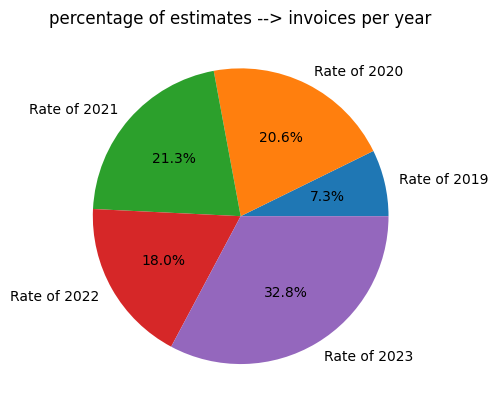

In [ ]:
perc = [perc_2019, perc_2020, perc_2021, perc_2022, perc_2023]
years = ['Rate of 2019', 'Rate of 2020', 'Rate of 2021', 'Rate of 2022', 'Rate of 2023']
plt.pie(perc, labels= years, autopct='%1.1f%%')
plt.title('percentage of estimates --> invoices per year')

In [ ]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)

    # predicted response vector
    y_pred = b[0] + b[1]*x

    # plotting the regression line
    plt.plot(x, y_pred, color = "g")

    # putting labels
    plt.xlabel('estimates')
    plt.ylabel('invoices')

    # function to show plot
    plt.show()


[130900, 4200000, 1485250, 1081200, 615400]
[1564625, 17684125, 6061200, 5226300, 1631700]
[29 68 82 69 20]
[ 3 26 30 16 12]


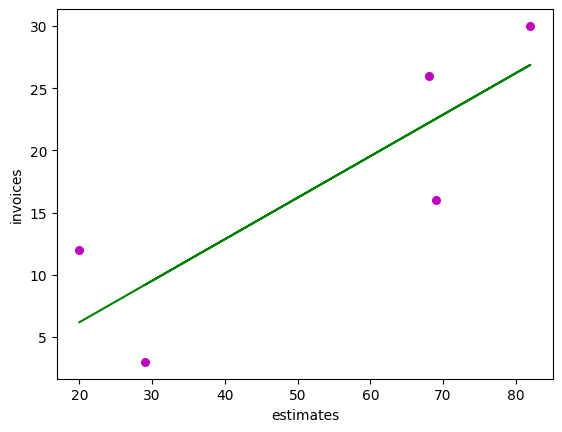

In [ ]:
amnt_inv = [sum_2019_inv, sum_2020_inv, sum_2021_inv, sum_2022_inv, sum_2023_inv]
print(amnt_inv)
amnt_est = [sum_2019_est, sum_2020_est, sum_2021_est, sum_2022_est, sum_2023_est]
print(amnt_est)
estimates_1 = np.array([len(data_2019['Estimate Number']), len(data_2020['Estimate Number']), len(data_2021_est['Estimate Number']), len(data_2022_est['Estimate Number']), len(data_2023_est['Estimate Number'])])
invoices_1 = np.array([len(data_2019_inv['Number']), len(data_2020_inv['Number']), len(data_2021_inv['Number']), len(data_2022_inv['Number']), len(data_2023_inv['Number'])])
print(estimates_1)
print(invoices_1)
#df_estimates = pd.DataFrame(['estimates','amnt_inv'],columns = [estimates, amnt_inv])
#print(estimates)
est = estimate_coef(estimates_1, invoices_1)
plot_regression_line(estimates_1, invoices_1, est)

Text(0.5, 1.0, 'Invoices')

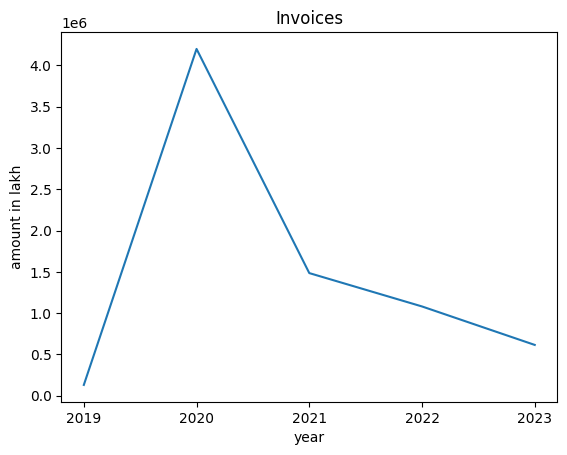

In [ ]:
years = ['2019', '2020', '2021', '2022', '2023']
plt.plot(years, amnt_inv)
plt.xlabel('year')
plt.ylabel('amount in lakh')
plt.title('Invoices')

Text(0.5, 1.0, 'Estimates')

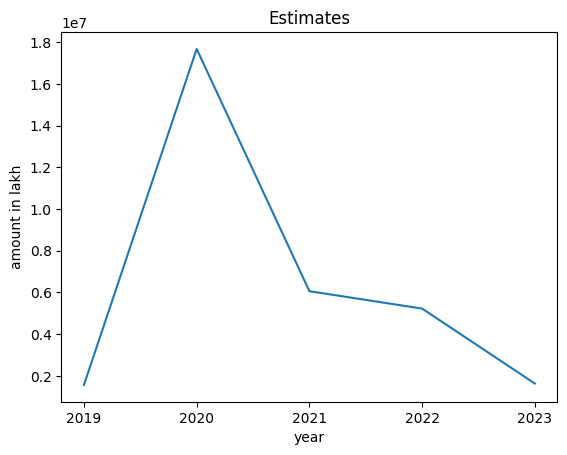

In [ ]:
years = ['2019', '2020', '2021', '2022', '2023']
plt.plot(years, amnt_est)
plt.xlabel('year')
plt.ylabel('amount in lakh')
plt.title('Estimates')

Text(0.5, 1.0, 'estimates and invoices')

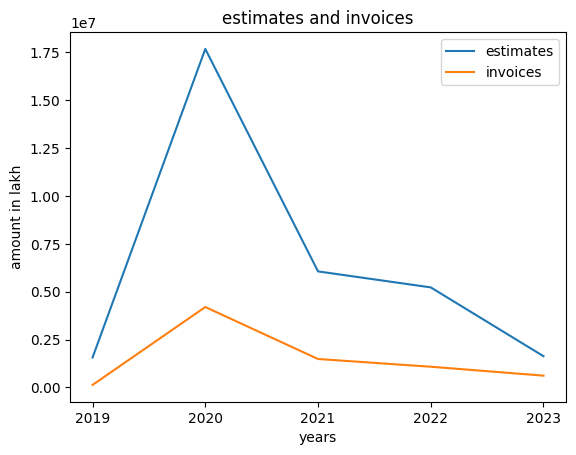

In [ ]:
plt.plot(years, amnt_est, label = 'estimates')
plt.plot(years, amnt_inv, label = 'invoices')
plt.xlabel('years')
plt.ylabel('amount in lakh')
plt.legend()
plt.title('estimates and invoices')


col_0  count
Date        
1          1
2          3
3          6
5          2
7          4
9          4
10         3
11         3
12         4


Text(0.5, 1.0, '2021 invoices')

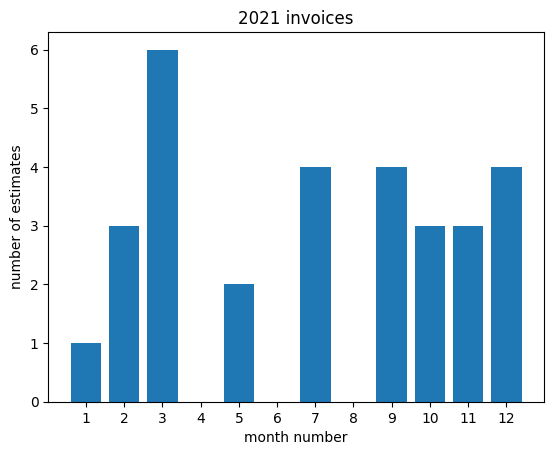

In [ ]:
x = data_2021_inv['Date'].dt.month
x12 = list(x)
x1 = set(x12)
#print(x1)
x2 = list(x1)
y3 = pd.crosstab(index=x, columns='count')
print(y3)
months = ['jan', 'feb', 'march', 'april', 'may', 'june', 'july', 'august', 'sept', 'oct', 'nov', 'dec']
plt.xticks(np.arange(0,13))
#plt.xticks(months)
plt.bar(x2, y3['count'])
plt.xlabel('month number')
plt.ylabel('number of estimates')
plt.title('2021 invoices')

col_0  count
Date        
1          5
2         13
3         14
4          4
5          2
6          5
7          7
8          5
9          5
10        11
11         5
12         6


Text(0.5, 1.0, '2021 estimates')

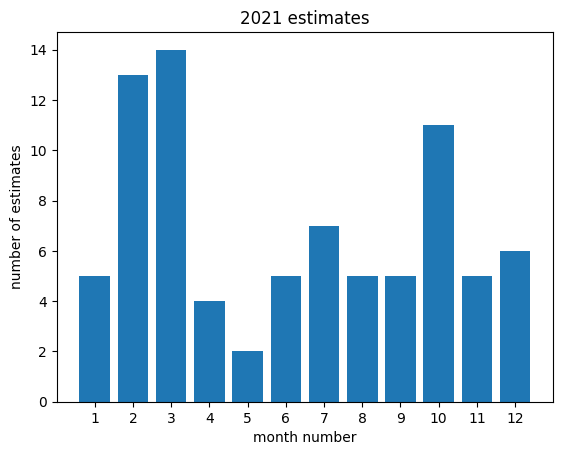

In [ ]:
x = data_2021_est['Date'].dt.month
x11 = list(x)
x1 = set(x11)
#print(x1)
x1 = list(x1)
y2 = pd.crosstab(index=x, columns='count')
print(y2)
months = ['jan', 'feb', 'march', 'april', 'may', 'june', 'july', 'august', 'sept', 'oct', 'nov', 'dec']
plt.xticks(np.arange(0,13))
#plt.xticks(months)
plt.bar(x1, y2['count'])
plt.xlabel('month number')
plt.ylabel('number of estimates')
plt.title('2021 estimates')

col_0  count
Date        
1          3
2          2
3          1
4          1
5          1
6          1
8          1
11         1
12         5


Text(0.5, 1.0, '2022 invoices')

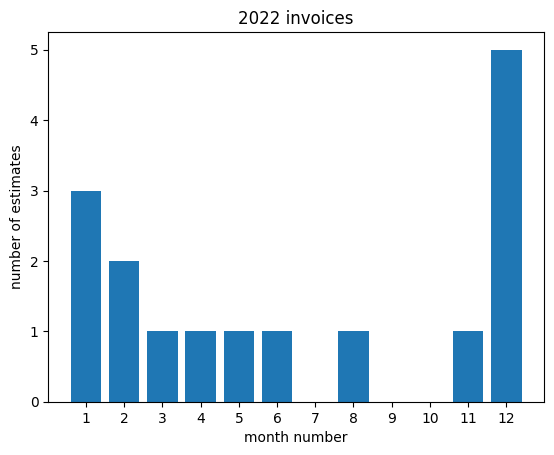

In [ ]:
x = data_2022_inv['Date'].dt.month
x12 = list(x)
x1 = set(x12)
#print(x1)
x2 = list(x1)
y3 = pd.crosstab(index=x, columns='count')
print(y3)
months = ['jan', 'feb', 'march', 'april', 'may', 'june', 'july', 'august', 'sept', 'oct', 'nov', 'dec']
plt.xticks(np.arange(0,13))
#plt.xticks(months)
plt.bar(x2, y3['count'])
plt.xlabel('month number')
plt.ylabel('number of estimates')
plt.title('2022 invoices')

col_0  count
Date        
1          6
2          7
3          8
4          8
5          3
6          4
7          3
8          8
9          6
10         6
11         8
12         2


Text(0.5, 1.0, '2022 estimates')

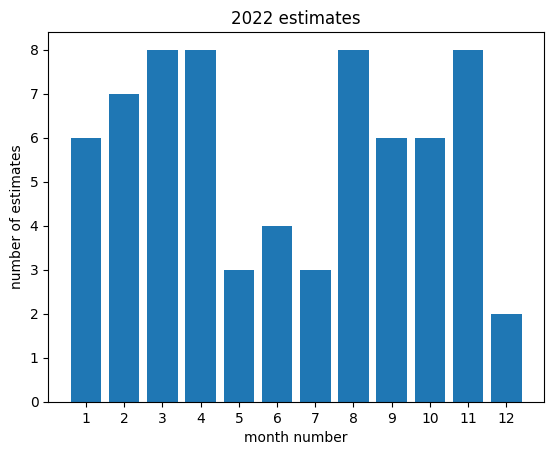

In [ ]:
x = data_2022_est['Date'].dt.month
x11 = list(x)
x1 = set(x11)
#print(x1)
x1 = list(x1)
y2 = pd.crosstab(index=x, columns='count')
print(y2)
months = ['jan', 'feb', 'march', 'april', 'may', 'june', 'july', 'august', 'sept', 'oct', 'nov', 'dec']
plt.xticks(np.arange(0,13))
#plt.xticks(months)
plt.bar(x1, y2['count'])
plt.xlabel('month number')
plt.ylabel('number of estimates')
plt.title('2022 estimates')

col_0  count
Date        
1          7
2          1
3          1
4          3


Text(0.5, 1.0, '2023 invoices')

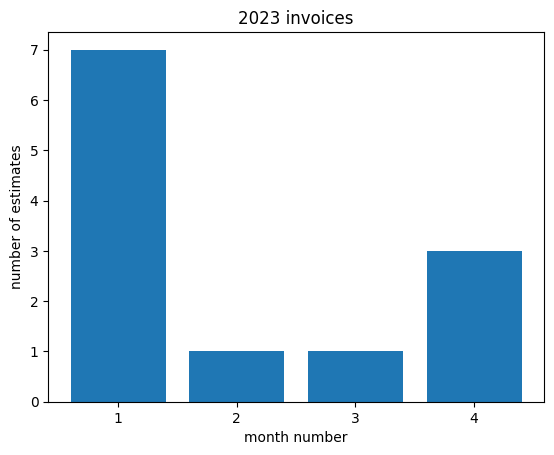

In [ ]:
x = data_2023_inv['Date'].dt.month
x12 = list(x)
x1 = set(x12)
#print(x1)
x2 = list(x1)
y3 = pd.crosstab(index=x, columns='count')
print(y3)
months = ['jan', 'feb', 'march', 'april', 'may', 'june', 'july', 'august', 'sept', 'oct', 'nov', 'dec']
plt.xticks(np.arange(0,13))
#plt.xticks(months)
plt.bar(x2, y3['count'])
plt.xlabel('month number')
plt.ylabel('number of estimates')
plt.title('2023 invoices')

col_0  count
Date        
1          3
2          1
3          4
4         12


Text(0.5, 1.0, '2023 estimates')

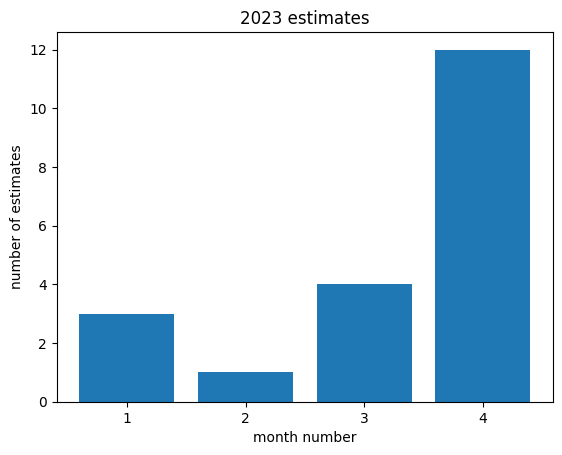

In [ ]:
x = data_2023_est['Date'].dt.month
x11 = list(x)
x1 = set(x11)
#print(x1)
x1 = list(x1)
y2 = pd.crosstab(index=x, columns='count')
print(y2)
months = ['jan', 'feb', 'march', 'april', 'may', 'june', 'july', 'august', 'sept', 'oct', 'nov', 'dec']
plt.xticks(np.arange(0,13))
#plt.xticks(months)
plt.bar(x1, y2['count'])
plt.xlabel('month number')
plt.ylabel('number of estimates')
plt.title('2023 estimates')

average rate of conversion, estimates --> invoices

In [ ]:
(perc_2019 + perc_2020 + perc_2021 + perc_2022 + perc_2023) / 5

23.004700493487338

In [ ]:
perc_2019 , perc_2020 , perc_2021 , perc_2022 , perc_2023

(8.366221938164097,
 23.750114862906706,
 24.504223586088564,
 20.687675793582457,
 37.715266286694856)

In [ ]:
est = [sum_2019_est, sum_2020_est, sum_2021_est, sum_2022_est, sum_2023_est]
inv = [sum_2019_inv, sum_2020_inv, sum_2021_inv, sum_2022_inv, sum_2023_inv]
data = {'est':est, 'inv':inv}
df_est_inv = pd.DataFrame(data)
correlation = df_est_inv['est'].corr(df_est_inv['inv'])
correlation

0.9933608602751313

In [ ]:
inv

[130900, 4200000, 1485250, 1081200, 615400]